# yapay sinir ağı: 
* temelde lojistik regresyon modelini alınıp ardarda en az 2 kez tekraralanmasıyla oluşur. lofistik regresyon modeli 1 katmanlı bir modeldir, sinir ağları ise en az 2 katmandan oluşan yapılardır.
* lojistik regresyonda, sadece girdi ve çıktı katmanları vardır. ancak sinir ağında giriş ve çıkış katmanı arasında en az bir gizli katman vardır. 
derin ogrenme son(35. dakika) tekrar izle

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [47]:
veri = pd.read_csv("egitim.csv")
print("Verinin Boyutu: ",veri.shape) 
veri.head()

Verinin Boyutu:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
label_filtre0 = 0
label_filtre1 = 1
veri = pd.concat([veri[veri["label"]==label_filtre0], 
                  veri[veri["label"]==label_filtre1]], axis=0)
veri.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# label ayarlama
Y_veri = veri["label"]

# x egitim veri seti olusturma
X_veri = veri.drop(["label"], axis=1)
print("X veri: ", X_veri.shape)
print("Y veri: ", Y_veri.shape)

X veri:  (8816, 784)
Y veri:  (8816,)


In [50]:
# resmin boyutunu kullanacağız
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

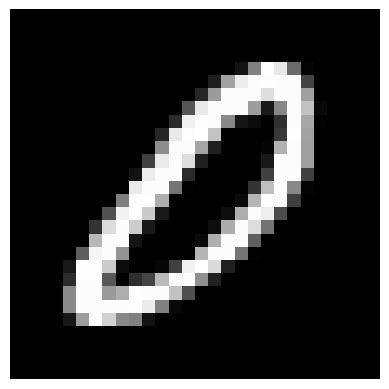

In [51]:
# verimizi görselleştirelim 0 sınıfı
resim1 = X_veri.iloc[900].values
resim1 = resim1.reshape((resim_boyutu,resim_boyutu))
plt.imshow(resim1,cmap='gray')
plt.axis('off')
plt.show()

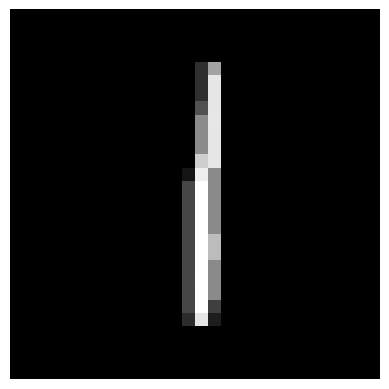

In [54]:
resim2 = X_veri.iloc[8000].values
resim2 = resim2.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim2, cmap='gray')
plt.axis('off')
plt.show() 

In [55]:
# egitim test bölmesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri, Y_veri, test_size=0.15, random_state=42)
print("x egitim: ", X_egitim.shape)
print("x test: ", X_test.shape)

x egitim:  (7493, 784)
x test:  (1323, 784)


In [58]:
x_egitim = X_egitim.T 
x_test = X_test.T
y_egitim = Y_egitim.values.reshape(-1,1).T
y_test = Y_test.values.reshape(-1,1).T
print(" x egitim: ", x_egitim.shape)
print(" x test: ", x_test.shape)
print(" y egitim: ", y_egitim.shape)
print(" y test: ", y_test.shape)

 x egitim:  (784, 7493)
 x test:  (784, 1323)
 y egitim:  (1, 7493)
 y test:  (1, 1323)
